# Importing the Dependies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# Data  Collection and Analysis

In [5]:
#loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers.csv')

In [6]:
#First 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#finding the number of rows and columns
customer_data.shape

(200, 5)

In [8]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
#checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

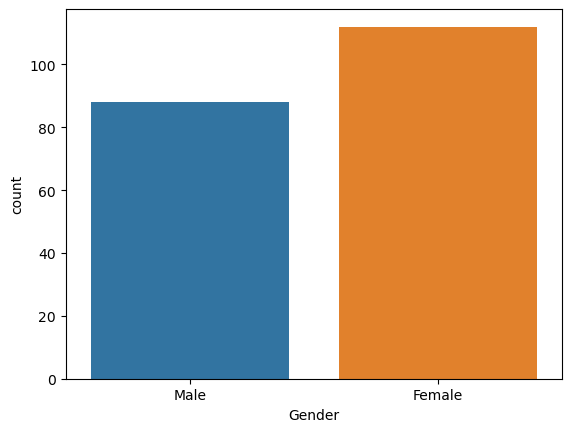

In [10]:
sns.countplot(customer_data['Gender'])

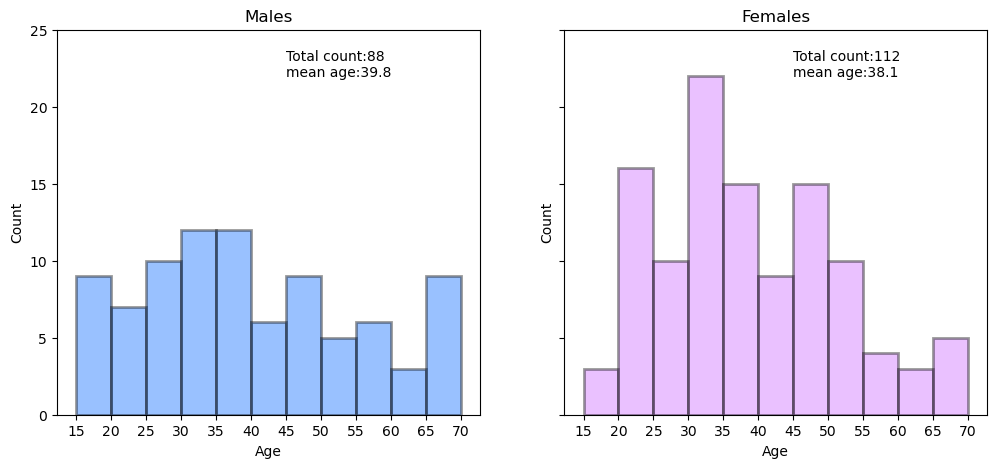

In [11]:
#subsset with males age
males_age = customer_data[customer_data['Gender']=='Male']['Age'] 

#subset with females ae
females_age = customer_data[customer_data['Gender']=='Female']['Age'] 

age_bins = range(15,75,5)


#male histogram
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5), sharey = True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax = ax1, hist_kws = dict(edgecolor="k", linewidth=2))
             
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23,"Total count:{}".format(males_age.count()))
ax1.text(45,22,"mean age:{:,.1f}".format(males_age.mean()))
             
#females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax = ax2, hist_kws = dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')            
ax2.set_ylabel('Count')
ax2.text(45,23,"Total count:{}".format(females_age.count()))
ax2.text(45,22,"mean age:{:,.1f}".format(females_age.mean()))
             
plt.show()

In [12]:
print('Kolgomoto-smirnov test p-value: {:,.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomoto-smirnov test p-value: 0.49


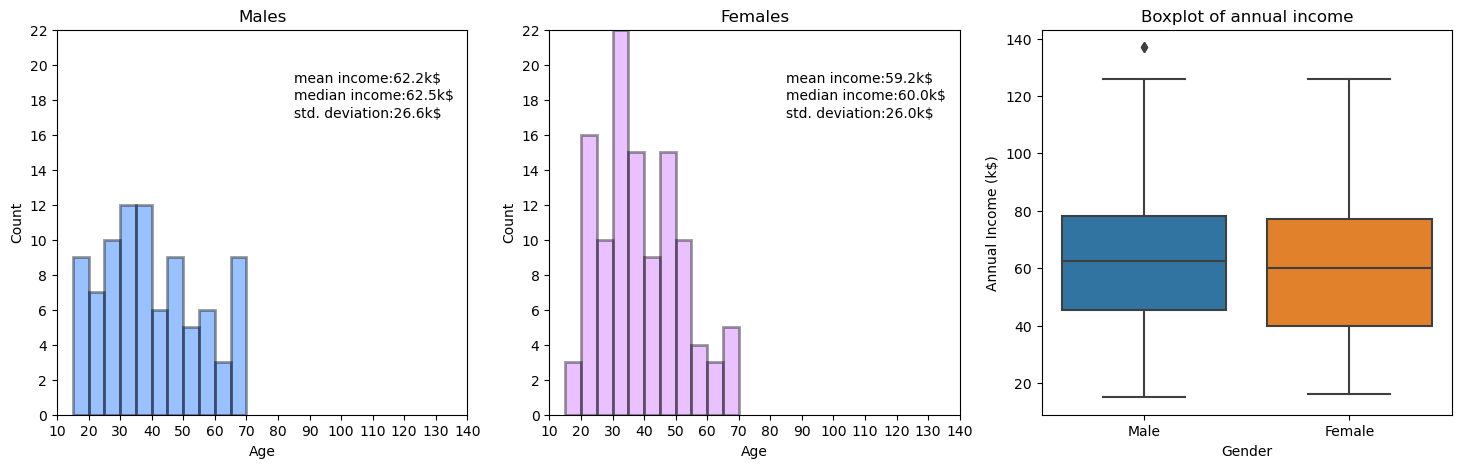

In [13]:
males_income = customer_data[customer_data['Gender']=='Male']['Annual Income (k$)']
females_income = customer_data[customer_data['Gender']=='Female']['Annual Income (k$)']

my_bins= range(10,150,10)

#male histogram
fig2, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax = ax1, hist_kws = dict(edgecolor="k", linewidth=2))
             
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19,"mean income:{:,.1f}k$".format(males_income.mean()))
ax1.text(85,18,"median income:{:,.1f}k$".format(males_income.median()))
ax1.text(85,17,"std. deviation:{:,.1f}k$".format(males_income.std()))

#females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax = ax2, hist_kws = dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')            
ax2.set_ylabel('Count')
ax2.text(85,19,"mean income:{:,.1f}k$".format(females_income.mean()))
ax2.text(85,18,"median income:{:,.1f}k$".format(females_income.median()))
ax2.text(85,17,"std. deviation:{:,.1f}k$".format(females_income.std()))


#boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=customer_data , ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

Correlation

Text(0, 120, 'Pearson: -0.33')

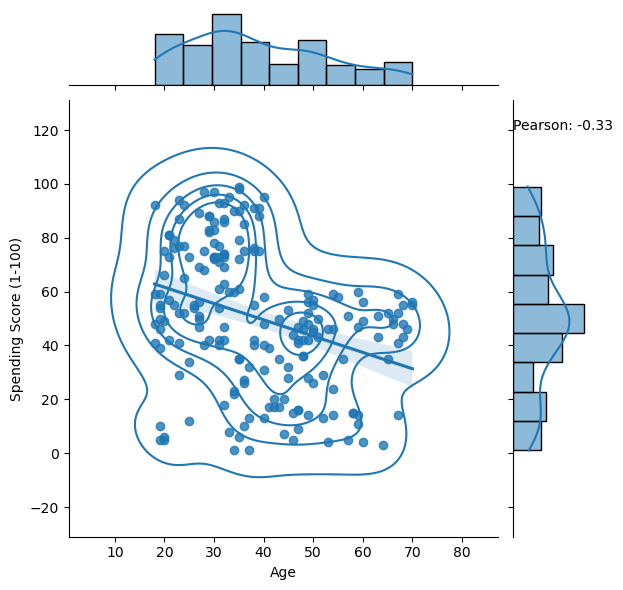

In [14]:
from scipy.stats import pearsonr

#calculating Pearson's correlation

corr,_=pearsonr(customer_data['Age'], customer_data['Spending Score (1-100)'])

jp = (sns.jointplot('Age', 'Spending Score (1-100)', data=customer_data,kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6 )
plt.text(0,120, 'Pearson: {:,.2f}'.format(corr))

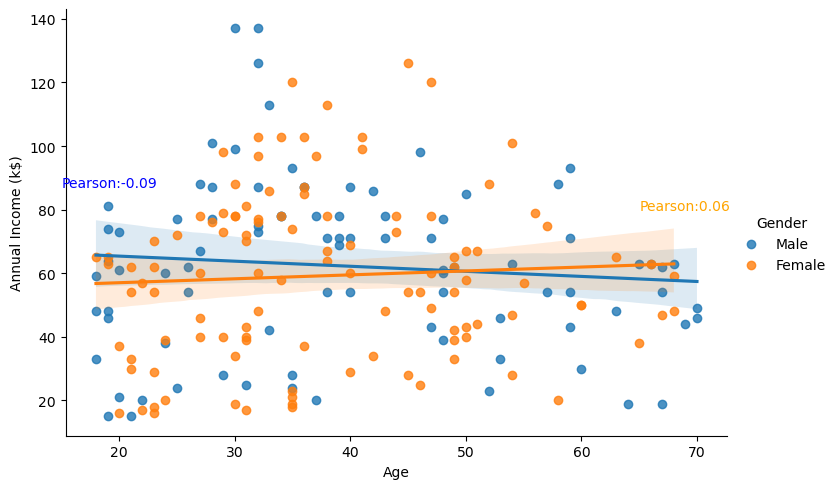

In [15]:
#calculating Pearson's correlation
corr1,_ = pearsonr(males_age.values, males_income.values) 
corr2,_ = pearsonr(females_age.values, females_income.values) 

sns.lmplot('Age', 'Annual Income (k$)', data=customer_data, hue='Gender', aspect=1.5)

plt.text(15,87, 'Pearson:{:.2f}'.format(corr1),color='blue')
plt.text(65,80, 'Pearson:{:.2f}'.format(corr2),color='orange')

plt.show()

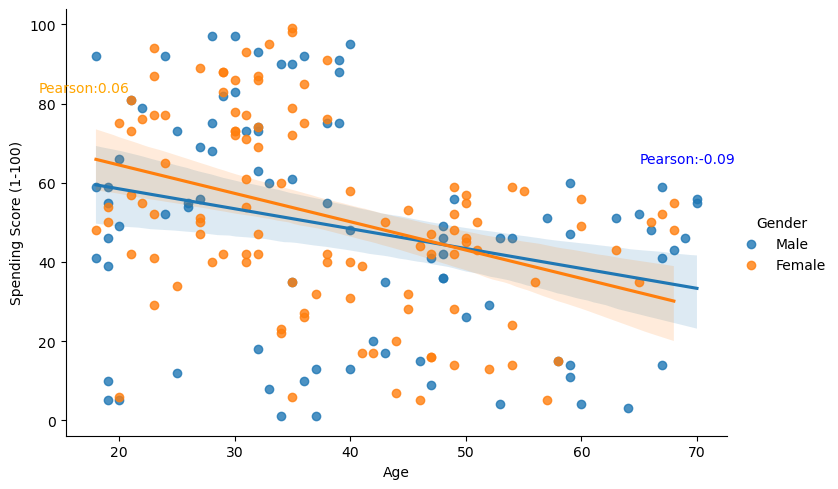

In [16]:
#calculating Pearson's correlation
corr1,_ = pearsonr(males_age.values, males_income.values) 
corr2,_ = pearsonr(females_age.values, females_income.values) 

sns.lmplot('Age', 'Spending Score (1-100)', data=customer_data, hue='Gender', aspect=1.5)

plt.text(65,65, 'Pearson:{:.2f}'.format(corr1),color='blue')
plt.text(13,83, 'Pearson:{:.2f}'.format(corr2),color='orange')

plt.show()

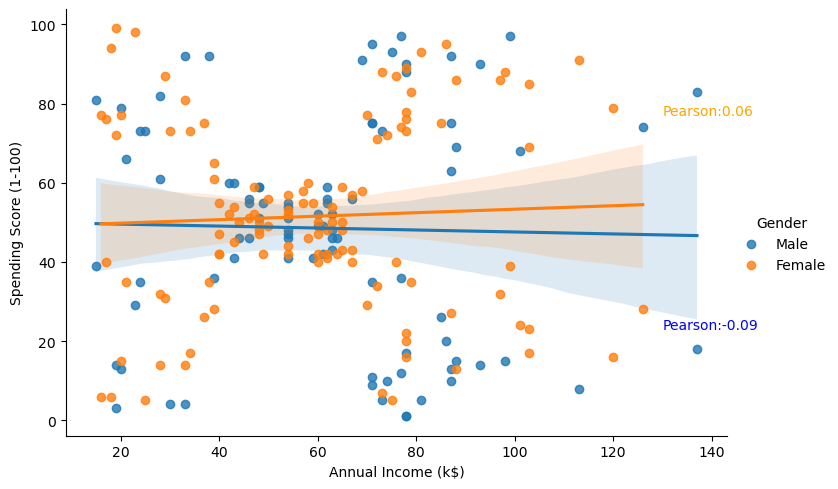

In [17]:
#calculating Pearson's correlation
corr1,_ = pearsonr(males_age.values, males_income.values) 
corr2,_ = pearsonr(females_age.values, females_income.values) 

sns.lmplot( 'Annual Income (k$)', 'Spending Score (1-100)', data=customer_data, hue='Gender', aspect=1.5)

plt.text(130,23, 'Pearson:{:.2f}'.format(corr1),color='blue')
plt.text(130,77, 'Pearson:{:.2f}'.format(corr2),color='orange')

plt.show()

# Choosing the Annual Income Column and Spending Score Column


In [18]:
X = customer_data.iloc[:,[3,4]].values

In [19]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]


# Choosing the number of clusters

In [20]:
#finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters =i, init='k-means++',random_state=42)
    kmeans.fit(X)
    
    
    wcss.append(kmeans.inertia_)

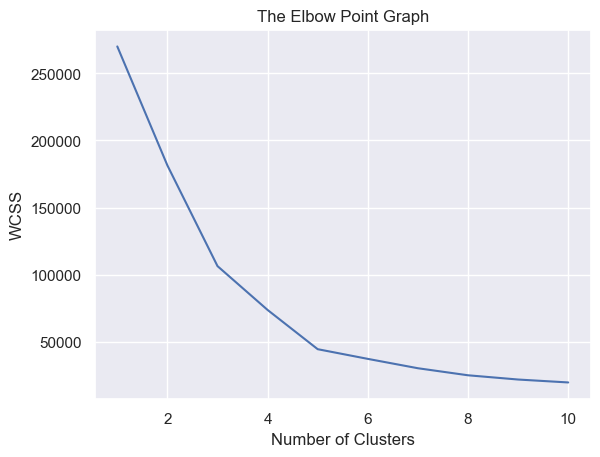

In [21]:
# plot an elbow growth

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Optimum Number of Clusters =5

Training the K-Means Clustering Model

In [22]:
kmeans = KMeans(n_clusters =5, init = 'k-means++', random_state = 0)

#return a label for each data point based on their cluster

Y=kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# Visualizing all the Customers

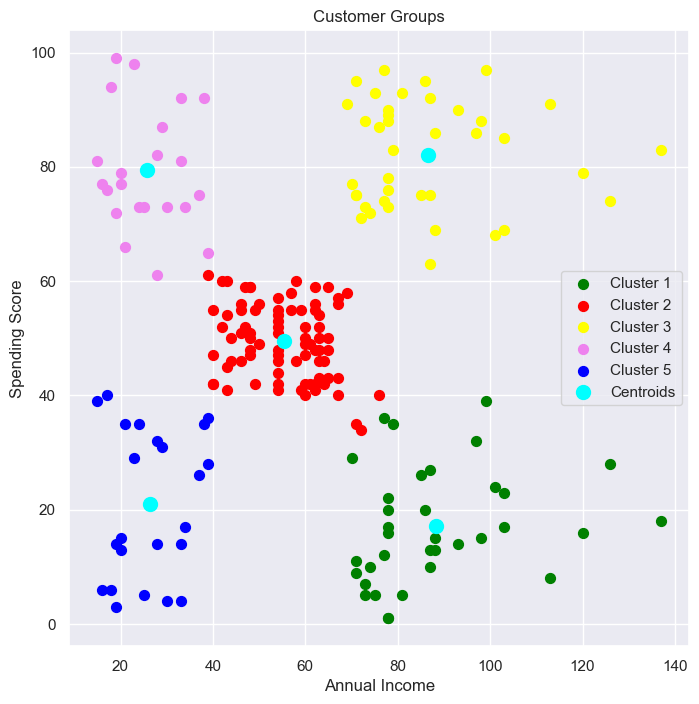

In [23]:
#plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')


#plot the centroids 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c='cyan', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## DBSCAN

In [66]:
X_numerics = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
from itertools import product

eps_values =np.arange(8,12.75,0.25)
min_samples = np.arange(3,10)
DBSCAN_params = list(product(eps_values, min_samples))

In [63]:
no_of_clusters=[]

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    

heatplot below shows how many clusters were generaed by the algorithm for the respective parameters combinations 

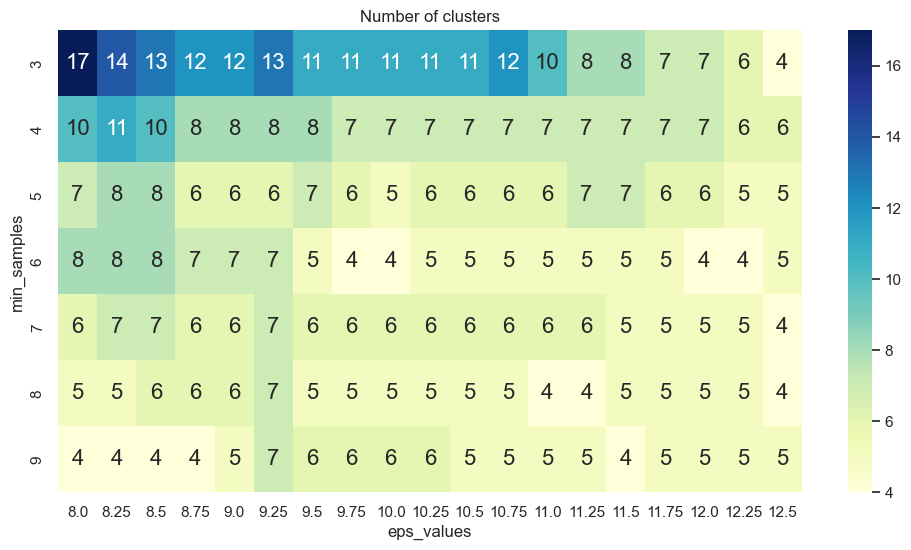

In [32]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns = ['eps_values', 'min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='min_samples', columns='eps_values')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot =True, annot_kws={"size":16},cmap="YlGnBu" , ax=ax)
ax.set_title('Number of clusters')
plt.show()

In [34]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster']=DBS_clustering.labels_

In [35]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns =["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


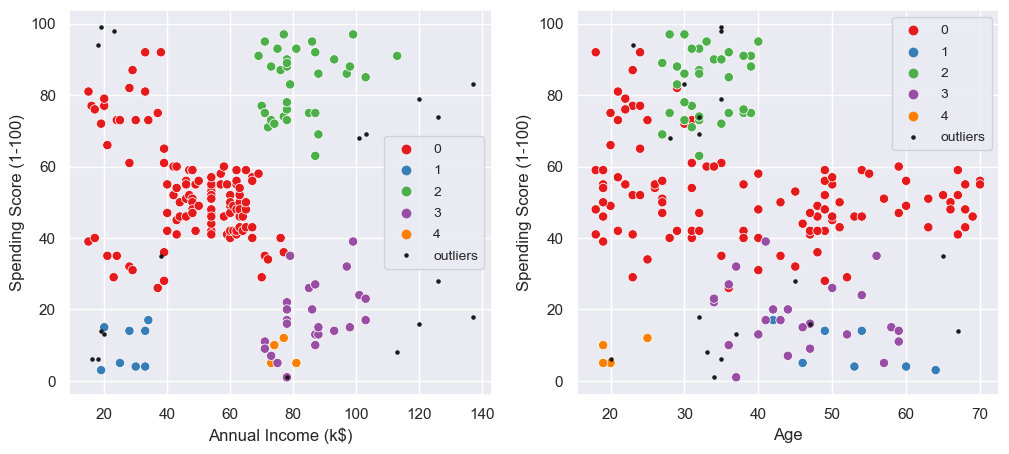

In [40]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]
fig2,(axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', 
               data = DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
               hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)
sns.scatterplot('Age', 'Spending Score (1-100)', 
               data = DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
               hue='Cluster', ax=axes[1], palette='Set1', legend='full', s=45)
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()
plt.setp(axes[0].get_legend().get_texts(),fontsize='10')
plt.setp(axes[1].get_legend().get_texts(),fontsize='10')
plt.show()

## Agglomerative Clustering

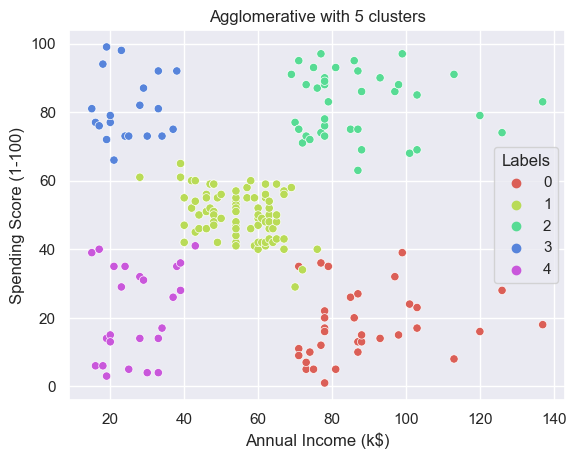

In [44]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters = 5, linkage='average').fit(X_numerics)
X_numerics['Labels'] =agglo.labels_
sns.scatterplot(X_numerics['Annual Income (k$)'], X_numerics['Spending Score (1-100)'],hue=X_numerics['Labels'],
               palette= sns.color_palette('hls',5))
plt.title('Agglomerative with 5 clusters')
plt.show()

In [46]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(X_numerics, X_numerics)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


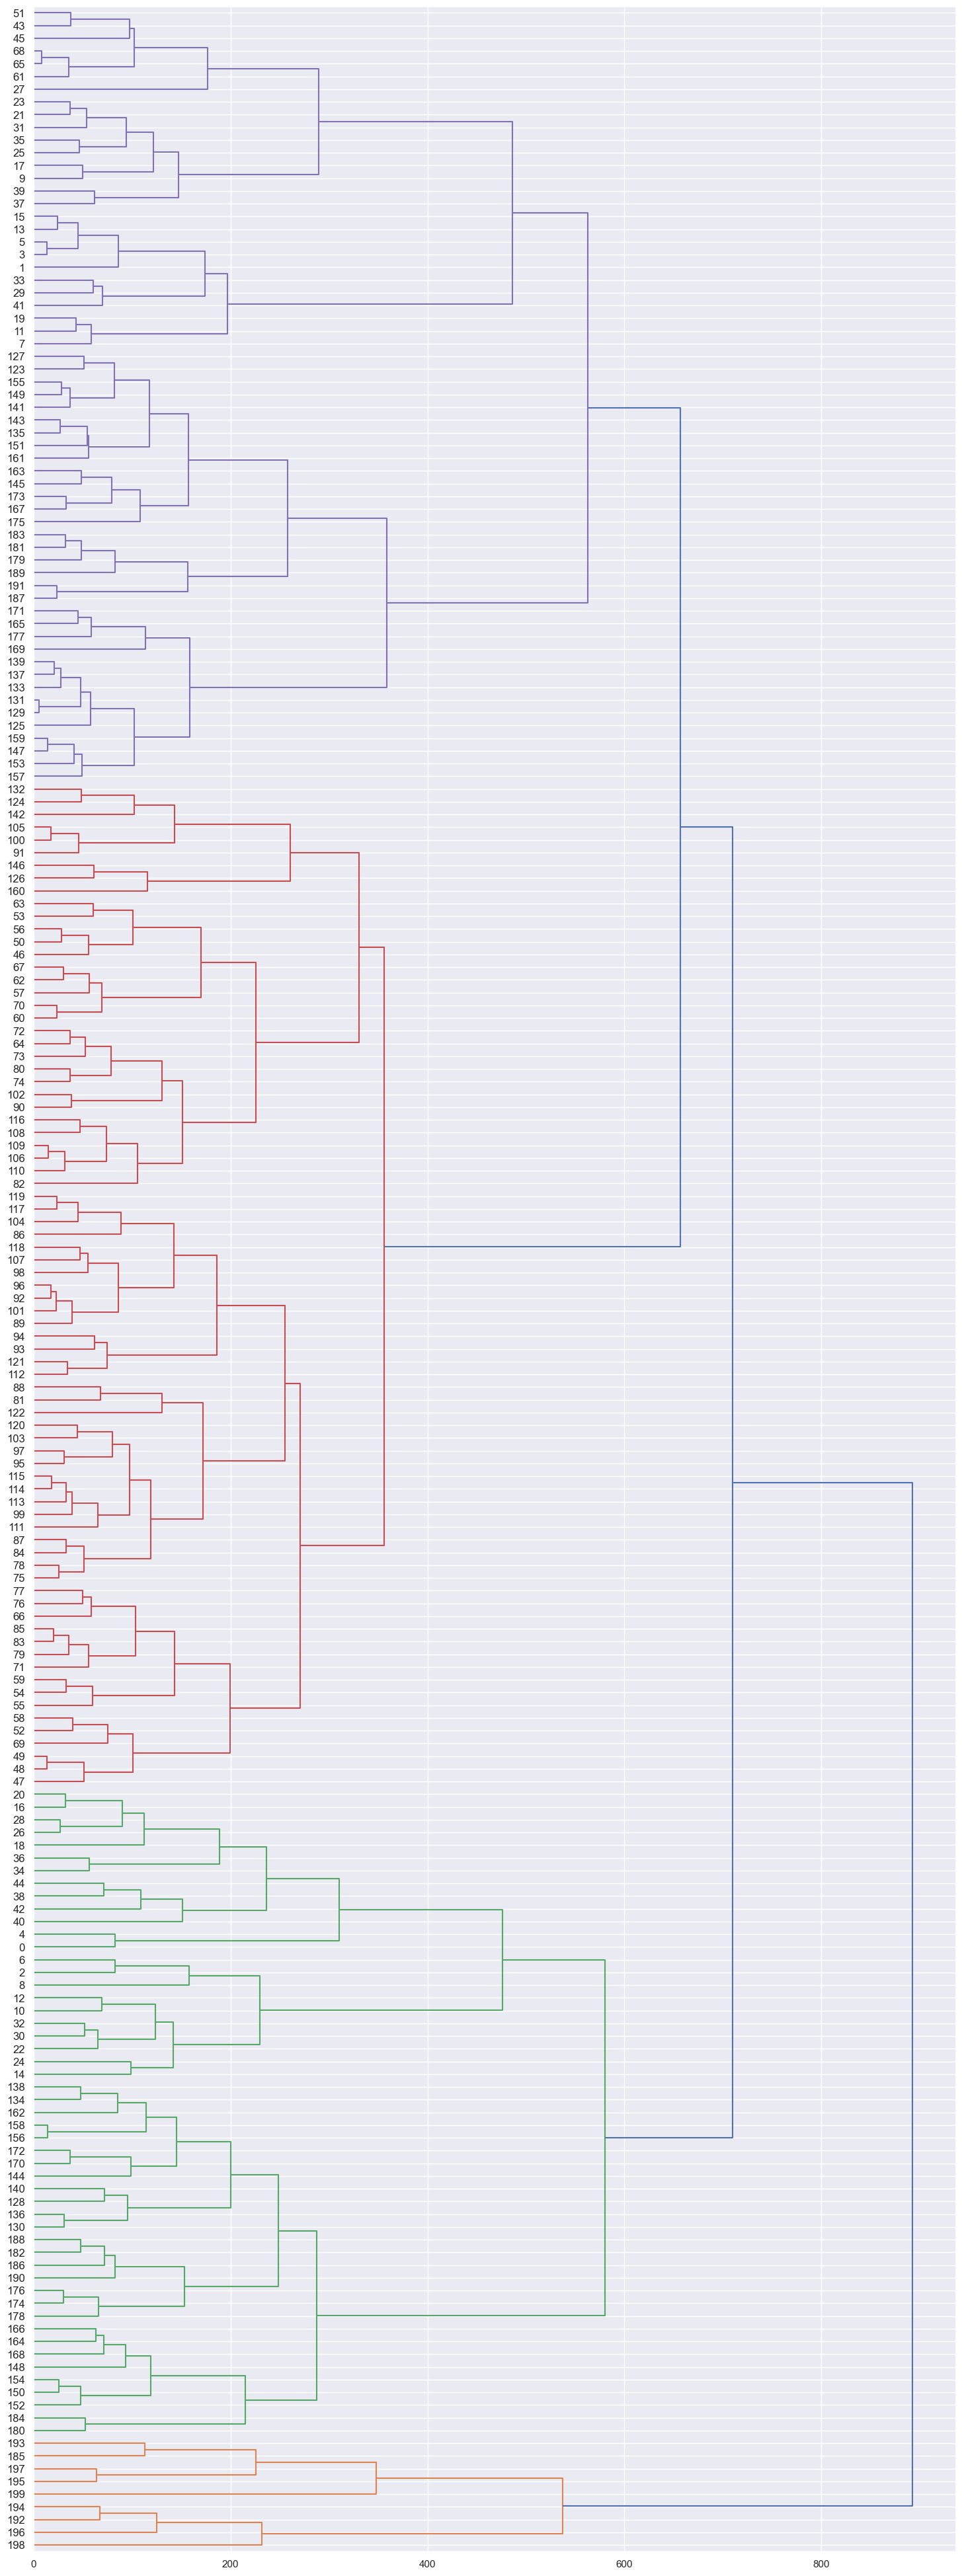

In [48]:
Z = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(18,50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

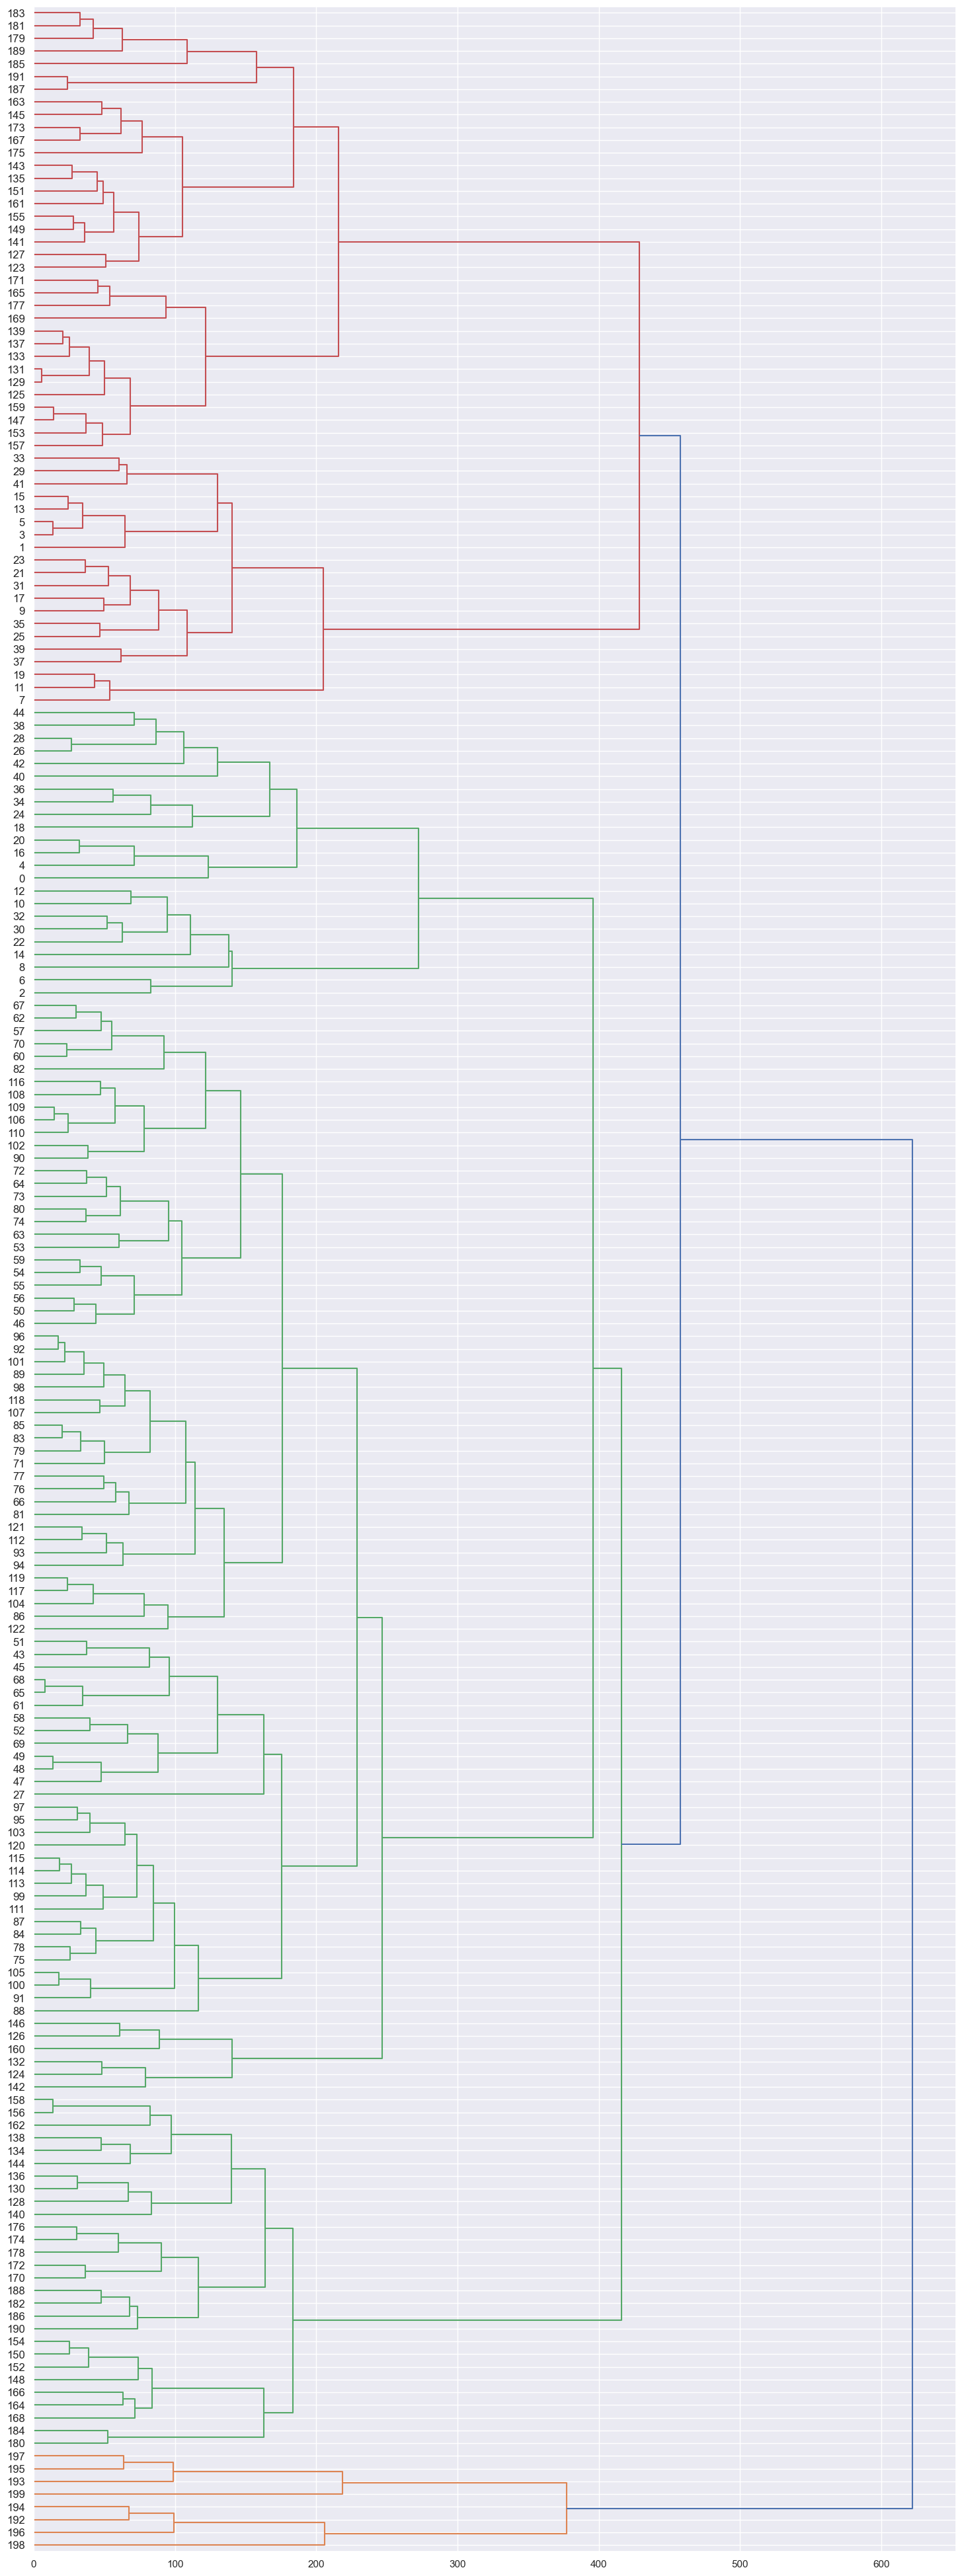

In [49]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18,50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

In [50]:
Agg_clustered= X_numerics.copy()
Agg_clustered.loc[:,'Cluster']= agglo.labels_


In [51]:
Agg_clust_size= Agg_clustered.groupby('Cluster').size().to_frame()
Agg_clust_size.columns = ["Agg_size"]
Agg_clust_size

,Agg_size
Cluster,
0,35
1,82
2,39
3,20
4,24


In [58]:
clusters = pd.concat([DBSCAN_clust_sizes, Agg_clust_size],axis=1, sort=False)
clusters
    

,DBSCAN_size,Agg_size
Cluster,,
-1,18,NaN
0,112,35.0
1,8,82.0
2,34,39.0
3,24,20.0
4,4,24.0
